**Installing kaggle on Colab**

In [9]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


**Downloading kaggle dataset**

In [3]:
! kaggle datasets download ashaychoudhary/europe-temperature-rise-dataset

Dataset URL: https://www.kaggle.com/datasets/ashaychoudhary/europe-temperature-rise-dataset
License(s): MIT
  0% 0.00/10.2k [00:00<?, ?B/s]
100% 10.2k/10.2k [00:00<00:00, 22.2MB/s]


**Unzip the zip file**

In [4]:
! pip install patool
import patoolib
patoolib.extract_archive('europe-temperature-rise-dataset.zip')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.4/98.4 kB 4.1 MB/s eta 0:00:00


INFO patool: Extracting europe-temperature-rise-dataset.zip ...
INFO:patool:Extracting europe-temperature-rise-dataset.zip ...
INFO patool: running /usr/bin/7z x -aou -o./Unpack_ut79s6tw -- europe-temperature-rise-dataset.zip
INFO:patool:running /usr/bin/7z x -aou -o./Unpack_ut79s6tw -- europe-temperature-rise-dataset.zip
INFO patool: ... europe-temperature-rise-dataset.zip extracted to `europe_temperature_rise.csv'.
INFO:patool:... europe-temperature-rise-dataset.zip extracted to `europe_temperature_rise.csv'.


'europe_temperature_rise.csv'

**Read the data**

In [8]:
import pandas as pd
data = pd.read_csv('europe_temperature_rise.csv')
data.head()

,Country,Region,Latitude,Longitude,Population (millions),GDP per capita (USD),Temperature Rise 1900-2000 (°C),Temperature Rise 2000-2020 (°C),"Temperature Rise 2020-2050 (°C, projected)",Average Annual Temperature (°C),...,"Air Pollution (PM2.5, µg/m³)",Sea Level Rise Impact (%),Climate Policy Index (0-100),Renewable Energy (%),Climate Investment (Billion USD),Extreme Weather Events (per year),Urban Heat Island Effect (°C),Water Stress Index (0-100),Biodiversity Loss (%),Energy Consumption per Capita (MWh)
0,Albania,Eastern Europe,39.503168,28.493539,55.733674,50472.940015,1.278292,2.150957,2.736177,2.751428,...,47.488797,0.478701,60.646957,41.066571,88.496058,12,1.450598,89.954801,0.336719,16.035230
1,Andorra,Western Europe,60.067986,24.697616,43.731077,59582.408388,1.754220,1.898282,2.650494,-3.040453,...,20.405668,4.025409,38.965659,57.085238,82.298780,18,2.377529,60.783616,2.550432,34.131989
2,Armenia,Northern Europe,52.578046,52.161287,19.218690,78584.302291,1.801738,2.343815,1.082222,3.236206,...,15.379082,1.402602,69.173099,37.042798,44.130999,19,2.406643,69.310981,2.279000,18.737764
3,Austria,Southern Europe,44.286890,-8.295888,17.471275,17083.221579,1.907655,2.333682,1.190985,1.955846,...,6.862033,5.291946,36.112032,25.944223,79.004302,3,2.205832,19.541886,4.986259,6.830983
4,Azerbaijan,Western Europe,40.065351,59.574316,32.749894,19688.068112,0.870734,1.364050,1.632888,18.731856,...,42.460575,3.011677,52.639630,44.453396,56.325350,6,1.706035,17.910574,1.956988,42.847556


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 22 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country                                     50 non-null     object 
 1   Region                                      50 non-null     object 
 2   Latitude                                    50 non-null     float64
 3   Longitude                                   50 non-null     float64
 4   Population (millions)                       50 non-null     float64
 5   GDP per capita (USD)                        50 non-null     float64
 6   Temperature Rise 1900-2000 (°C)             50 non-null     float64
 7   Temperature Rise 2000-2020 (°C)             50 non-null     float64
 8   Temperature Rise 2020-2050 (°C, projected)  50 non-null     float64
 9   Average Annual Temperature (°C)             50 non-null     float64
 10  GHG Emissions (M

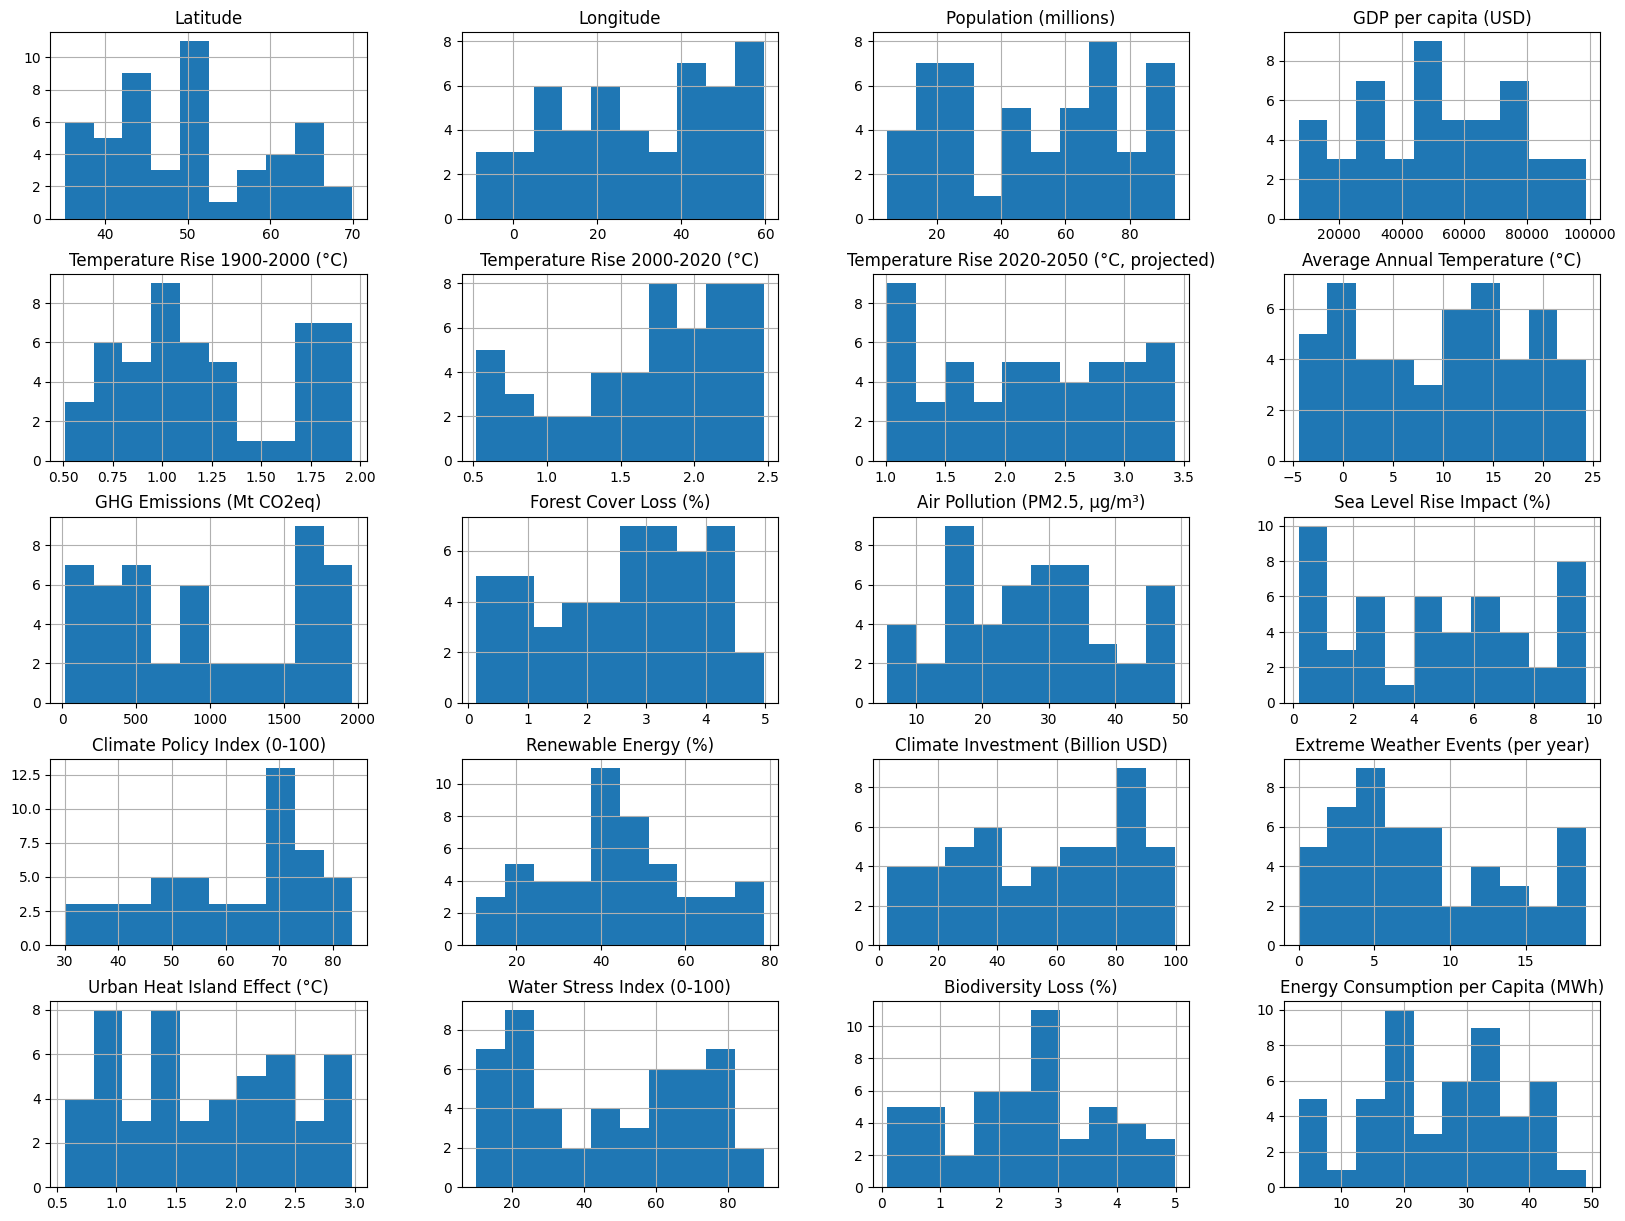

In [14]:
import matplotlib.pyplot as plt
data.hist(bins=10, figsize=(20,15))
plt.show()

**Visualize and getting insights of the data**

<Axes: xlabel='Latitude', ylabel='Average Annual Temperature (°C)'>

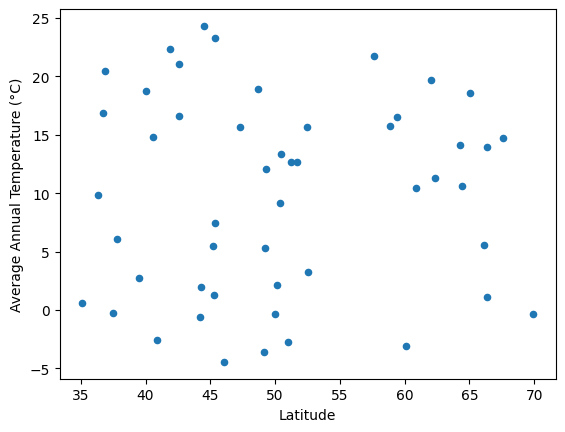

In [15]:
data.plot(kind="scatter",x="Latitude", y="Average Annual Temperature (°C)")

<Axes: xlabel='Air Pollution (PM2.5, µg/m³)', ylabel='Energy Consumption per Capita (MWh)'>

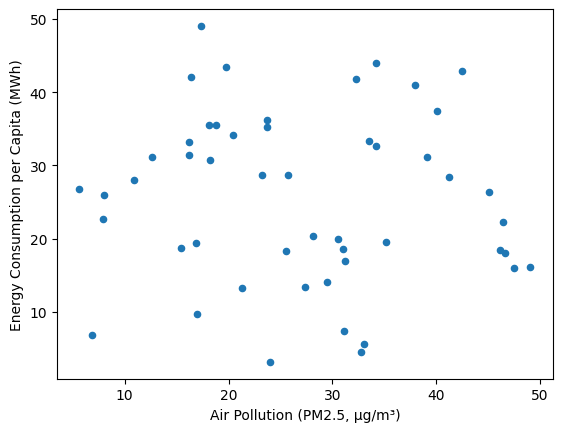

In [17]:
data.plot(kind="scatter",x="Air Pollution (PM2.5, µg/m³)", y="Energy Consumption per Capita (MWh)")

**Looking for correlation**

In [18]:
corr_matrix = data.select_dtypes(include=['number']).corr()

In [19]:
corr_matrix["Average Annual Temperature (°C)"].sort_values(ascending=False)

,Average Annual Temperature (°C)
Average Annual Temperature (°C),1.000000
Population (millions),0.226827
Forest Cover Loss (%),0.170773
GDP per capita (USD),0.164374
"Air Pollution (PM2.5, µg/m³)",0.101928
Renewable Energy (%),0.070478
Biodiversity Loss (%),0.059773
Latitude,0.032213
Longitude,0.014189
"Temperature Rise 2020-2050 (°C, projected)",-0.009462


array([[<Axes: xlabel='Average Annual Temperature (°C)', ylabel='Average Annual Temperature (°C)'>,
        <Axes: xlabel='Climate Investment (Billion USD)', ylabel='Average Annual Temperature (°C)'>,
        <Axes: xlabel='Air Pollution (PM2.5, µg/m³)', ylabel='Average Annual Temperature (°C)'>,
        <Axes: xlabel='Energy Consumption per Capita (MWh)', ylabel='Average Annual Temperature (°C)'>],
       [<Axes: xlabel='Average Annual Temperature (°C)', ylabel='Climate Investment (Billion USD)'>,
        <Axes: xlabel='Climate Investment (Billion USD)', ylabel='Climate Investment (Billion USD)'>,
        <Axes: xlabel='Air Pollution (PM2.5, µg/m³)', ylabel='Climate Investment (Billion USD)'>,
        <Axes: xlabel='Energy Consumption per Capita (MWh)', ylabel='Climate Investment (Billion USD)'>],
       [<Axes: xlabel='Average Annual Temperature (°C)', ylabel='Air Pollution (PM2.5, µg/m³)'>,
        <Axes: xlabel='Climate Investment (Billion USD)', ylabel='Air Pollution (PM2.5, µg/m³

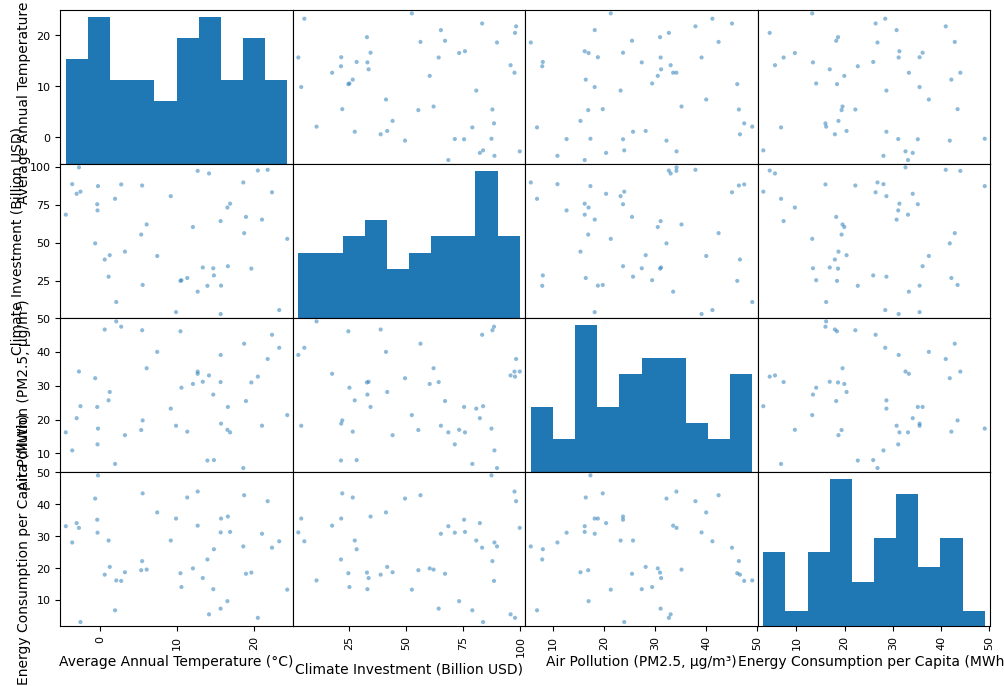

In [22]:
from pandas.plotting import scatter_matrix

attributes = [ "Average Annual Temperature (°C)", "Climate Investment (Billion USD)", "Air Pollution (PM2.5, µg/m³)",
              "Energy Consumption per Capita (MWh)"]
scatter_matrix(data[attributes], figsize=(12, 8))

**Kesimpulan**

Dari data yang kita punya dapat diambil kesimpulan bahwa rata-rata suhu di Eropa tidak terlalu dipengaruhi oleh hal-hal yang ada di atas. Yang berarti ada faktor eksternal yang memengaruhi rata-rata suhu di Eropa. Namun dari data yang kita punya hal yang paling berpengaruh pada suhu di Eropa adalah populasi (Korelasi positif lemah), dan Urban heat island (UHI) effect (Korelasi negatif lemah)